In [1]:
import numpy as np

In [13]:
import os

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import torch
import random

In [47]:
def save_heat_map(output_destination_folder, file_name,tick_marks, data,epochs_per_stage,last, num_subnets, no_sandwich ):
    plt.clf()
    assert tick_marks, "please provide tickmarks to generate the graph"
    ax = sns.heatmap(data,  linewidth=0.5,xticklabels=tick_marks, yticklabels=tick_marks)
    ax.invert_xaxis()
    ax.set_xlabel('config used for eval')
    ax.set_ylabel('lower bound for the elasticity')
    # ax.axis([5, 12,5,12])
    plot_file_name = file_name
#     plot_file_name += "last" if last else "best"
    plot_file_name += ".png"

    print("plot file name : " , plot_file_name)
    plot_title_name = "attention_ratio" + " " + str(num_subnets) + " subnets ; "
    plot_title_name += "sandwich " if not no_sandwich else "no sandwich "
    plot_title_name += str(epochs_per_stage) + " epochs per stage "
    plot_title_name += "last" if last else "best"
    plt.title(plot_title_name)
    
    print("plot title name : " , plot_title_name)

    
    plt.savefig(plot_file_name)

    # ax = sns.heatmap(best_model_acc,  linewidth=0.5,xticklabels=list(range(5,13)), yticklabels=list(range(5,13)))
    # ax.invert_yaxis()
    # ax.set_xlabel('num layers used for eval')
    # ax.set_ylabel('num layers for the trained model')
    # # ax.axis([5, 12,5,12])
    # plt.title("2 subnets; no sandwich; 1 epoch per layer; best model")

    # plt.savefig(os.path.join(output_destination_folder,'./2subnet_noSandwich_1epoch_best_heatmap.png'))
    # save_checkpoint(destination_folder + '/2subnet_noSandwich_1epoch_last_model.pt', model, -1) 
    


In [6]:
num_subnets = 4

In [17]:
attention_dimensions = [i/10 for i in range(1,11,1)]
attention_dimensions.sort(reverse=True)

In [19]:
attention_dimensions

[1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

In [5]:
output_destination_folder = "../runscripts/outputs"

In [7]:
epochs_per_stage=1
subnets_list = [2,4,8]

In [9]:
sandwich=True

In [20]:
file_prefix =  "elastic_attention_ratio_" + str(attention_dimensions) + "_epochs_" + str(epochs_per_stage) + "_num_subnets_"+str(num_subnets)+"_sandwich_"+str(sandwich)


In [11]:
last_model_acc = None
best_model_acc = None

In [36]:
file_name = os.path.join(output_destination_folder,"./"+file_prefix + '_last')
with open( file_name+".npy", 'rb') as f:
    last_model_acc=np.load(f)
save_heat_map(output_destination_folder, file_name,attention_dimensions, last_model_acc,1,True, 4, False )


plot file name :  ../runscripts/outputs/./elastic_attention_ratio_[1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]_epochs_1_num_subnets_4_sandwich_True_bestbest.png
plot title name :  elastic_attention_ratio_[1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]_epochs_1_num_subnets_4_sandwich_True 4 subnets ; sandwich 1 epochs per stage best


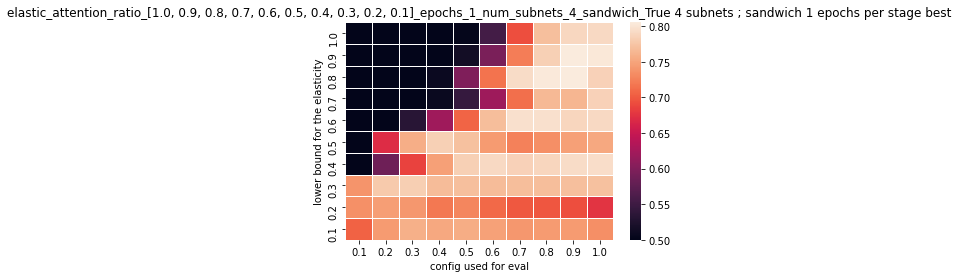

In [42]:
file_name = os.path.join(output_destination_folder,"./"+file_prefix + '_best')
with open(file_name+".npy", 'rb') as f:    
    best_model_acc=np.load(f)
save_heat_map(output_destination_folder, file_name,attention_dimensions, best_model_acc,1,False, 4, False )


plot file name :  ../runscripts/outputs/./elastic_attention_ratio_[1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]_epochs_1_num_subnets_2_sandwich_True_last.png
plot title name :  attention_ratio 2 subnets ; sandwich 1 epochs per stage last
plot file name :  ../runscripts/outputs/./elastic_attention_ratio_[1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]_epochs_1_num_subnets_2_sandwich_True_best.png
plot title name :  attention_ratio 2 subnets ; sandwich 1 epochs per stage best
plot file name :  ../runscripts/outputs/./elastic_attention_ratio_[1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]_epochs_1_num_subnets_4_sandwich_True_last.png
plot title name :  attention_ratio 4 subnets ; sandwich 1 epochs per stage last
plot file name :  ../runscripts/outputs/./elastic_attention_ratio_[1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]_epochs_1_num_subnets_4_sandwich_True_best.png
plot title name :  attention_ratio 4 subnets ; sandwich 1 epochs per stage best
plot file name :  ../runscri

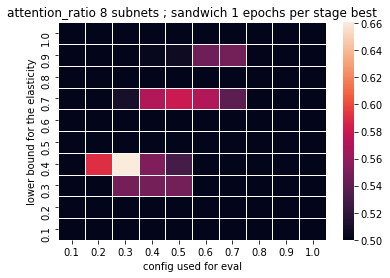

In [49]:
for num_subnets in subnets_list:
    file_prefix =  "elastic_attention_ratio_" + str(attention_dimensions) + "_epochs_" + str(epochs_per_stage) + "_num_subnets_"+str(num_subnets)+"_sandwich_"+str(sandwich)
    file_name = os.path.join(output_destination_folder,"./"+file_prefix + '_last')
    with open( file_name+".npy", 'rb') as f:
        last_model_acc=np.load(f)
    save_heat_map(output_destination_folder, file_name,attention_dimensions, last_model_acc,1,True, num_subnets, False )
    file_name = os.path.join(output_destination_folder,"./"+file_prefix + '_best')
    with open(file_name+".npy", 'rb') as f:    
        best_model_acc=np.load(f)
    save_heat_map(output_destination_folder, file_name,attention_dimensions, best_model_acc,1,False, num_subnets, False )


plot file name :  ../runscripts/outputs/./elastic_attention_ratio_[1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]_epochs_1_num_subnets_4_sandwich_True_last.png
plot title name :  attention_ratio 8 subnets ; sandwich 1 epochs per stage last


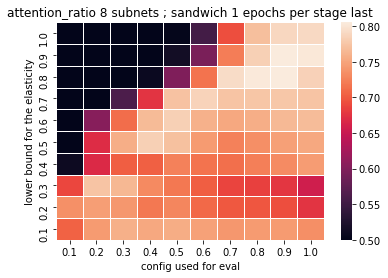

In [51]:
file_prefix =  "elastic_attention_ratio_" + str(attention_dimensions) + "_epochs_" + str(epochs_per_stage) + "_num_subnets_"+str(4)+"_sandwich_"+str(sandwich)
file_name = os.path.join(output_destination_folder,"./"+file_prefix + '_last')
with open( file_name+".npy", 'rb') as f:
    last_model_acc=np.load(f)
# save_heat_map(output_destination_folder, file_name,attention_dimensions, last_model_acc,1,True, num_subnets, False )
file_name = os.path.join(output_destination_folder,"./"+file_prefix + '_best')
with open(file_name+".npy", 'rb') as f:    
    best_model_acc=np.load(f)

In [62]:
for i, val in enumerate(attention_dimensions):
    print(val, " : " , last_model_acc[-1][i])

1.0  :  0.73504
0.9  :  0.74288
0.8  :  0.74324
0.7  :  0.74104
0.6  :  0.74728
0.5  :  0.75616
0.4  :  0.7524
0.3  :  0.75812
0.2  :  0.74308
0.1  :  0.705


In [60]:
for i, val in enumerate(attention_dimensions):
    print(val, " : " , best_model_acc[-1][i])

1.0  :  0.73504
0.9  :  0.74288
0.8  :  0.74324
0.7  :  0.74104
0.6  :  0.74728
0.5  :  0.75616
0.4  :  0.7524
0.3  :  0.75812
0.2  :  0.74308
0.1  :  0.705


In [61]:
file_name = os.path.join(output_destination_folder,"./"+file_prefix + '_last')
with open(file_name+".npy", 'rb') as f:    
    last_model_acc=np.load(f)